In [40]:
import pandas as pd
import seaborn as sns
import numpy as np

In [41]:
df = pd.read_csv("ricebeefcoffee.csv")
df

,Year,Month,Price_beef_kilo,Price_rice_kilo,Price_coffee_kilo,Inflation_rate,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,2.52,0.28,1.51,89.59,0.53,4.78,2.86
1,1992,Mar,2.45,0.28,1.55,89.59,0.53,4.64,2.94
2,1992,Apr,2.38,0.28,1.45,89.59,0.53,4.51,2.75
3,1992,May,2.38,0.27,1.34,89.59,0.51,4.51,2.54
4,1992,Jun,2.33,0.27,1.30,89.59,0.51,4.42,2.46
...,...,...,...,...,...,...,...,...,...
355,2021,Sep,5.66,0.40,4.97,-1.29,0.39,5.59,4.91
356,2021,Oct,5.70,0.40,5.31,-1.29,0.39,5.63,5.24
357,2021,Nov,5.95,0.40,5.71,-1.29,0.39,5.87,5.64
358,2021,Dec,5.95,0.40,5.91,-1.29,0.39,5.87,5.83


In [42]:
df.columns

Index(['Year', 'Month', 'Price_beef_kilo', 'Price_rice_kilo',
       'Price_coffee_kilo', 'Inflation_rate', 'Price_rice_infl',
       'Price_beef_infl', 'Price_coffee_infl'],
      dtype='str')

In [43]:
# filter out only some relevant data for not
# we'll use the inflation adjusted versions of hte prices
# SO THAT THEY ARE COMPARABLE
df = df.drop(['Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate'], axis=1)


In [44]:
df

,Year,Month,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,0.53,4.78,2.86
1,1992,Mar,0.53,4.64,2.94
2,1992,Apr,0.53,4.51,2.75
3,1992,May,0.51,4.51,2.54
4,1992,Jun,0.51,4.42,2.46
...,...,...,...,...,...
355,2021,Sep,0.39,5.59,4.91
356,2021,Oct,0.39,5.63,5.24
357,2021,Nov,0.39,5.87,5.64
358,2021,Dec,0.39,5.87,5.83


### Many ways to study a dataset like this, let's compare by the year first

In [45]:
df = df.drop("Month", axis=1)

In [46]:
df = df.groupby("Year").mean().dropna()
df

,Price_rice_infl,Price_beef_infl,Price_coffee_infl
Year,,,
1992,0.506364,4.633636,2.639091
1993,0.435000,4.820000,2.873333
1994,0.479167,4.185833,5.938333
1995,0.561667,3.260833,5.817500
1996,0.577500,2.968333,4.570833
1997,0.501667,3.063333,6.906667
1998,0.497500,2.801667,4.867500
1999,0.397500,2.890833,3.657500
2000,0.312500,2.975000,2.969167


<Axes: >

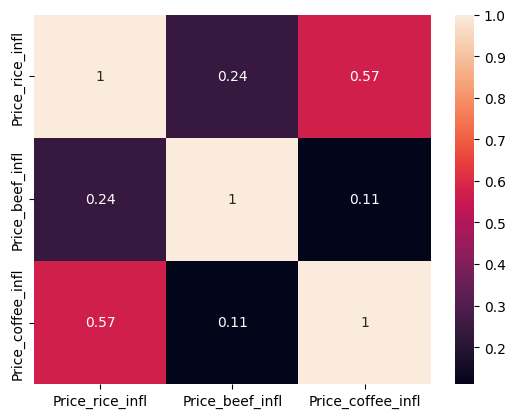

In [47]:
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

<Axes: ylabel='Year'>

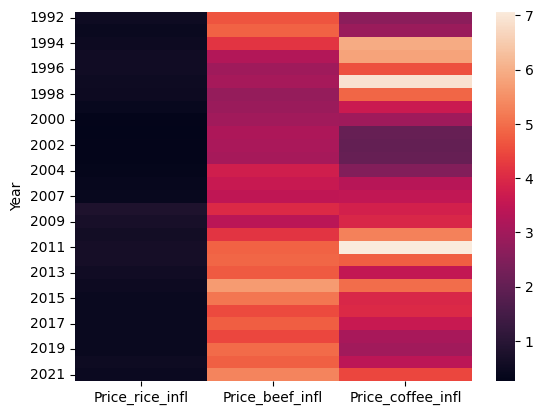

In [48]:
sns.heatmap(df)

You can Google/AI (based on the heatmap above) => coffee price 2011, coffee price 1997, rice price 2008, you should find information what happened in those dates / products.

### Reload the data and try something else

In [49]:
df = pd.read_csv("ricebeefcoffee.csv")
df = df.drop(['Price_beef_kilo', 'Price_rice_kilo', 'Price_coffee_kilo', 'Inflation_rate'], axis=1)
df

,Year,Month,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,Feb,0.53,4.78,2.86
1,1992,Mar,0.53,4.64,2.94
2,1992,Apr,0.53,4.51,2.75
3,1992,May,0.51,4.51,2.54
4,1992,Jun,0.51,4.42,2.46
...,...,...,...,...,...
355,2021,Sep,0.39,5.59,4.91
356,2021,Oct,0.39,5.63,5.24
357,2021,Nov,0.39,5.87,5.64
358,2021,Dec,0.39,5.87,5.83


In [50]:
# asked from ChatGPT, prompt:
# I have a month column in a pandas dataframe, in "Jan", "Feb" etc. format, 
# I wish to convert into numeric integer format

# Mapping month abbreviations to integers
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

# Convert the 'Month' column to numeric
df['Month'] = df['Month'].map(month_mapping)

In [51]:
df

,Year,Month,Price_rice_infl,Price_beef_infl,Price_coffee_infl
0,1992,2,0.53,4.78,2.86
1,1992,3,0.53,4.64,2.94
2,1992,4,0.53,4.51,2.75
3,1992,5,0.51,4.51,2.54
4,1992,6,0.51,4.42,2.46
...,...,...,...,...,...
355,2021,9,0.39,5.59,4.91
356,2021,10,0.39,5.63,5.24
357,2021,11,0.39,5.87,5.64
358,2021,12,0.39,5.87,5.83


<Axes: xlabel='Year', ylabel='Month'>

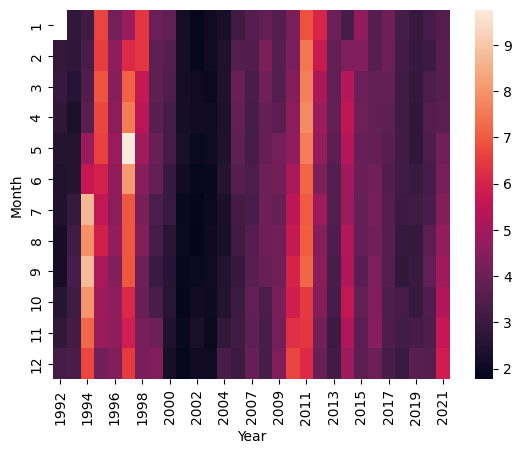

In [ ]:
# we can see high spots in 1997 May and couple of these in 1994 too
df_pivot = df.pivot_table(index="Month", columns="Year", values="Price_coffee_infl")
sns.heatmap(df_pivot)

<Axes: xlabel='Year', ylabel='Month'>

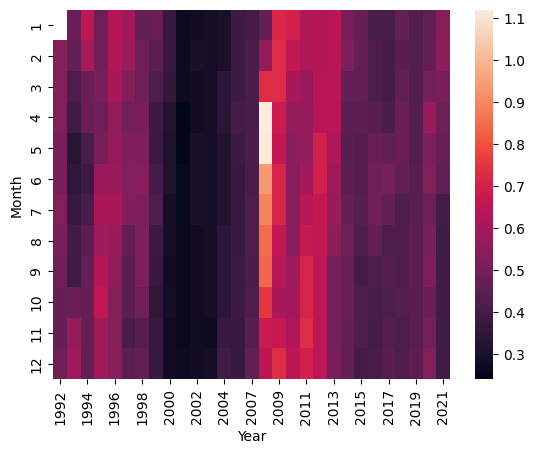

In [ ]:
# 2008 "rice crisis", Google it
df_pivot = df.pivot_table(index="Month", columns="Year", values="Price_rice_infl")
sns.heatmap(df_pivot)

<Axes: xlabel='Year', ylabel='Month'>

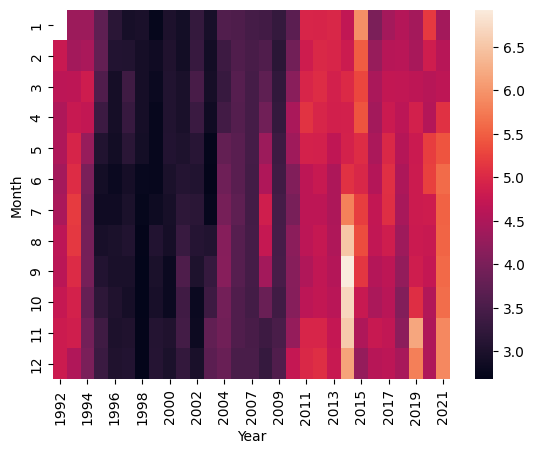

In [54]:
# 2008 "rice crisis", Google it
df_pivot = df.pivot_table(index="Month", columns="Year", values="Price_beef_infl")
sns.heatmap(df_pivot)